# Tree and KNN Classification

## Following the outcomes of the previous group exercise, proceed to complete the individual exercises as outlined below.

1. Tree Models:
    - Implement three different decision tree models (e.g., Decision Tree Classifier, Random Forest, Gradient Boosted Trees).
2. KNN Model:
   - Use the K-Nearest Neighbors algorithm and identify the optimal value of kk by plotting its performance against different kk-values.
3. Evaluation Metrics:
    - Evaluate all models using metrics such as accuracy, precision, recall, and F1-score.
4. Optimal kk for KNN:
    - Determine the best-fit kk for KNN by visualizing performance metrics across varying kk-values.

In [6]:
# Imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Helper function to evaluate classification models
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    metrics = {
        "Accuracy": accuracy_score(y_test, predictions),
        "Precision": precision_score(y_test, predictions, average='weighted', zero_division=0),
        "Recall": recall_score(y_test, predictions, average='weighted', zero_division=0),
        "F1-Score": f1_score(y_test, predictions, average='weighted')
    }
    return metrics

# Load the dataset
data = pd.read_csv('/Users/nimishmathur/Desktop/DA 1 Assignments/house_prices.csv')

# Preprocessing
data_encoded = data.copy()
label_encoders = {}

# Encode categorical columns
categorical_cols = data_encoded.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data_encoded[col])
    label_encoders[col] = le

# Impute missing values
numerical_cols = data_encoded.select_dtypes(include=['int64', 'float64']).columns
num_imputer = SimpleImputer(strategy="mean")
cat_imputer = SimpleImputer(strategy="most_frequent")
data_encoded[numerical_cols] = num_imputer.fit_transform(data_encoded[numerical_cols])
data_encoded[categorical_cols] = cat_imputer.fit_transform(data_encoded[categorical_cols])

# Categorize SalePrice into bins for classification
bins = [data_encoded['SalePrice'].min(), 250000, 500000, 750000, data_encoded['SalePrice'].max()]
labels = ['Low', 'Medium', 'High', 'Very High']
y_classified = pd.cut(data_encoded['SalePrice'], bins=bins, labels=labels, include_lowest=True)
y_classified_encoded = LabelEncoder().fit_transform(y_classified)

# Rescale features
X = data_encoded.drop(columns=['SalePrice'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_classified_encoded, test_size=0.2, random_state=42)

# Initialize classification models
decision_tree_clf = DecisionTreeClassifier(random_state=42)
random_forest_clf = RandomForestClassifier(random_state=42, n_estimators=100)
gradient_boost_clf = GradientBoostingClassifier(random_state=42)

# Train the models
decision_tree_clf.fit(X_train, y_train)
random_forest_clf.fit(X_train, y_train)
gradient_boost_clf.fit(X_train, y_train)

# Evaluate the models
decision_tree_metrics = evaluate_model(decision_tree_clf, X_test, y_test)
random_forest_metrics = evaluate_model(random_forest_clf, X_test, y_test)
gradient_boost_metrics = evaluate_model(gradient_boost_clf, X_test, y_test)

# Display results
classification_results = pd.DataFrame({
    "Decision Tree": decision_tree_metrics,
    "Random Forest": random_forest_metrics,
    "Gradient Boosting": gradient_boost_metrics
}).T

print(classification_results)


                   Accuracy  Precision    Recall  F1-Score
Decision Tree      0.829167   0.831691  0.829167  0.827277
Random Forest      0.841667   0.860376  0.841667  0.825862
Gradient Boosting  0.879167   0.879204  0.879167  0.878265


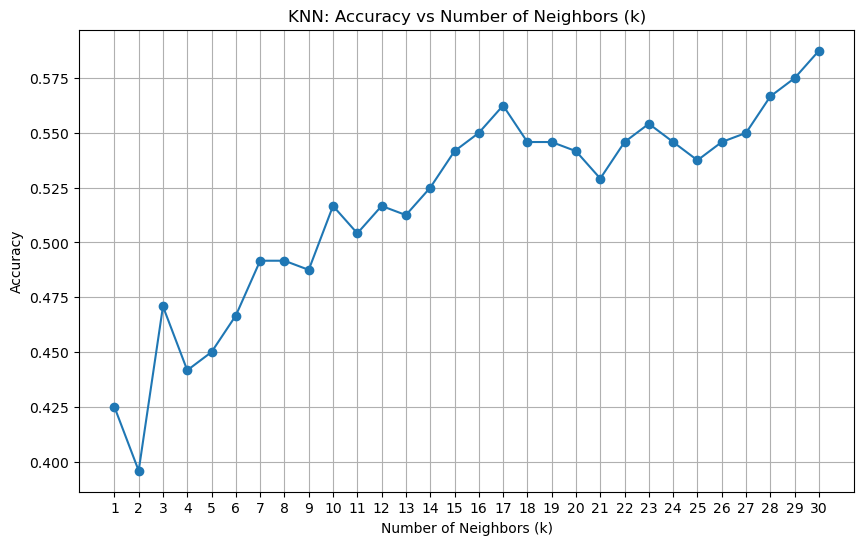

The optimal value of k is: 30


In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Initialize variables to store accuracy for different k-values
k_values = range(1, 31)
knn_accuracies = []

# Loop through different values of k to find the optimal k
for k in k_values:
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train, y_train)
    predictions = knn_clf.predict(X_test)
    acc = accuracy_score(y_test, predictions)
    knn_accuracies.append(acc)

# Plot accuracy vs k-values
plt.figure(figsize=(10, 6))
plt.plot(k_values, knn_accuracies, marker='o')
plt.title('KNN: Accuracy vs Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid()
plt.show()

# Identify the optimal k-value
optimal_k = k_values[np.argmax(knn_accuracies)]
print(f"The optimal value of k is: {optimal_k}")

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Helper function to evaluate models
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    metrics = {
        "Accuracy": accuracy_score(y_test, predictions),
        "Precision": precision_score(y_test, predictions, average='weighted', zero_division=0),
        "Recall": recall_score(y_test, predictions, average='weighted', zero_division=0),
        "F1-Score": f1_score(y_test, predictions, average='weighted')
    }
    return metrics

# Evaluate the trained classifiers
decision_tree_metrics = evaluate_model(decision_tree_clf, X_test, y_test)
random_forest_metrics = evaluate_model(random_forest_clf, X_test, y_test)
gradient_boost_metrics = evaluate_model(gradient_boost_clf, X_test, y_test)

# Optimal K for KNN
optimal_k = 5  # Use the optimal k from the earlier analysis or set a default value
knn_clf = KNeighborsClassifier(n_neighbors=optimal_k)
knn_clf.fit(X_train, y_train)
knn_metrics = evaluate_model(knn_clf, X_test, y_test)

# Compile results
all_results = pd.DataFrame({
    "Decision Tree": decision_tree_metrics,
    "Random Forest": random_forest_metrics,
    "Gradient Boosting": gradient_boost_metrics,
    "K-Nearest Neighbors": knn_metrics
}).T

# Display results
print("Model Evaluation Metrics:")
print(all_results)


Model Evaluation Metrics:
                     Accuracy  Precision    Recall  F1-Score
Decision Tree        0.829167   0.831691  0.829167  0.827277
Random Forest        0.841667   0.860376  0.841667  0.825862
Gradient Boosting    0.879167   0.879204  0.879167  0.878265
K-Nearest Neighbors  0.450000   0.503914  0.450000  0.450667


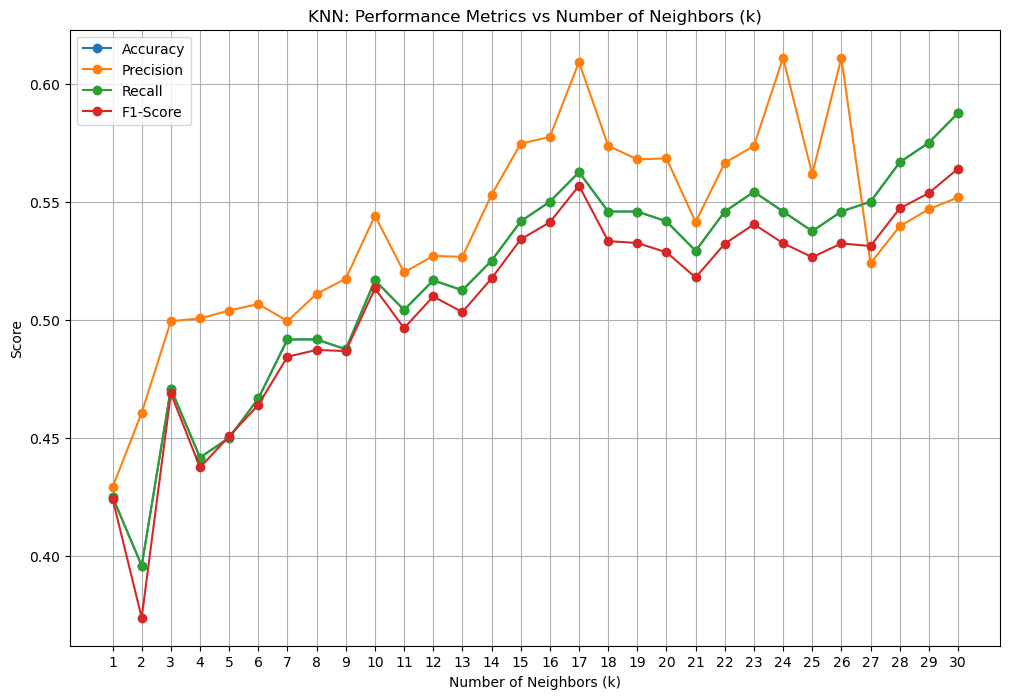

The best-fit k for KNN is: 30


In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Initialize variables to store metrics
k_values = range(1, 31)  # Test k from 1 to 30
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Loop through k-values to compute metrics
for k in k_values:
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train, y_train)
    predictions = knn_clf.predict(X_test)
    
    accuracy_scores.append(accuracy_score(y_test, predictions))
    precision_scores.append(precision_score(y_test, predictions, average='weighted', zero_division=0))
    recall_scores.append(recall_score(y_test, predictions, average='weighted', zero_division=0))
    f1_scores.append(f1_score(y_test, predictions, average='weighted'))

# Plot performance metrics
plt.figure(figsize=(12, 8))

plt.plot(k_values, accuracy_scores, label='Accuracy', marker='o')
plt.plot(k_values, precision_scores, label='Precision', marker='o')
plt.plot(k_values, recall_scores, label='Recall', marker='o')
plt.plot(k_values, f1_scores, label='F1-Score', marker='o')

plt.title('KNN: Performance Metrics vs Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Score')
plt.xticks(k_values)
plt.legend()
plt.grid()
plt.show()

# Identify the best k based on the highest F1-Score
best_k = k_values[f1_scores.index(max(f1_scores))]
print(f"The best-fit k for KNN is: {best_k}")
